In [110]:
import numpy as np
import copy

# 1 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.1 벡터와 행렬

n차원 벡터를 `numpy`로 만든다. 

In [33]:
x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [34]:
x.ndim

1

In [35]:
x = np.array([1, 2, 3])
x.shape

(3,)

In [39]:
x = np.array([[1, 2, 3]]) # Notice the difference. 
x.shape

(1, 3)

In [37]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [38]:
W.ndim

2

### 1.1.2 행렬의 원소별 연산

`+`와 `*` 은 모두 element-wise하게 연산된다. 

In [9]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [10]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 1.1.3 브로드캐스트

n x m 행렬에 scalar 값을 곱하면 element-wise하게 곱할 수 있게 스칼라가 n x m 행렬로 변한다. 

element-wise하다는 것에 주목하자. matrix multiplication (dot product) 하는 것이 아니다. 

In [13]:
A = np.array([[1, 2], [3, 4]])

A * 10

array([[10, 20],
       [30, 40]])

n x m 행렬에 1 x m 행렬을 곱할 때도 그냥은 연산이 불가하므로 스스로 n x m 으로 변한다. 

마찬가지로, element-wise 연산이기 때문에 그렇다. 

In [16]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([10, 20])

A * b

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [24]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 20], [10, 20], [10, 20]])

A * b

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

### 1.1.4 벡터의 내적과 행렬의 곱

벡터의 내적 (dot product & matrix multiplication) 

dot product는 두 벡터에 대해 정의되고, matrix multiplication 은 행렬 간 정의된다. 

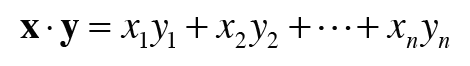

In [48]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.dot(a, b) # 사실 .dot으로도 matrix 연산 가능. 하지만 명확하게 하기 위해 그냥 dot과 matmul을 구분하여 쓰기로 하자. 

32

In [47]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.matmul(A, B)

array([[19, 22],
       [43, 50]])

### 1.1.5 행렬 형상 확인

n x m 은 m x l 과 곱 가능하다는 것을 기억. 

## 1.2 신경망의 추론

### 1.2.1 신경망 추론 전체 그림

미니배치의 경우를 살펴보자. 

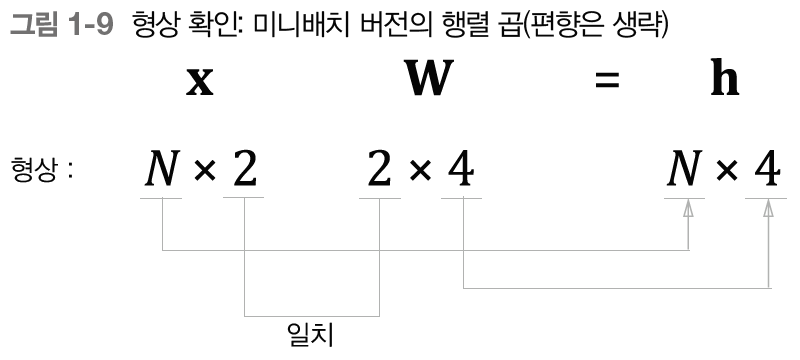

In [54]:
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1 # b1은 broadcast된다. 

h

array([[-2.50446459, -0.59690592,  0.13088567, -1.1656085 ],
       [-1.24595628, -1.0213551 , -0.16803352, -0.61561788],
       [-0.98328035, -0.77009771, -0.4357419 ,  0.0213325 ],
       [-4.38071394, -0.27585706,  0.7648674 , -2.46453539],
       [-0.11778393, -1.18277415, -0.5683472 ,  0.21400513],
       [ 4.27519768, -1.70861826, -2.18917391,  3.60226659],
       [-2.22886977,  1.28345393, -1.12673863,  1.98669811],
       [-1.33504083, -0.74060154, -0.29833877, -0.26935106],
       [-2.27791087,  0.11065098, -0.39655424,  0.13791407],
       [-2.4041728 ,  0.24892309, -0.4243745 ,  0.22975493]])

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [59]:
a = sigmoid(h)
a # 뉴런 출력. 이걸 다음 게층에 또 넣게된다. 

array([[0.07554579, 0.35505189, 0.53267478, 0.23764969],
       [0.22340091, 0.26476353, 0.45809019, 0.35077875],
       [0.27224138, 0.31645797, 0.39275606, 0.50533292],
       [0.0123617 , 0.43146977, 0.68240957, 0.07838208],
       [0.47058801, 0.23455376, 0.36161829, 0.55329803],
       [0.98628152, 0.15334302, 0.1007269 , 0.97346162],
       [0.09718776, 0.78303714, 0.24476348, 0.87939338],
       [0.20832678, 0.32287262, 0.42596364, 0.43306642],
       [0.09296897, 0.52763456, 0.4021405 , 0.53442397],
       [0.08285505, 0.56191142, 0.39547045, 0.55718739]])

### 1.2.2 계층으로 클래스화 및 순전파 구현

이 책에서는 다음의 구현규칙을 따른다:
- 모든 계층은 `forward()`와 `backward()` method를 가진다. 
- 모든 계층은 인스턴스 변수인 `params`와 `grads`를 가진다. 

In [2]:
class Sigmoid: # Activation function 
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [3]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [13]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(), 
            Affine(W2, b2),
        ]
        
        # 모든 가중치를 리스트에 모은다. 
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [14]:
np.random.randn(2, 3, 4)

array([[[-1.7286996 , -0.37593851, -1.46982313, -0.46473582],
        [-0.17722489,  0.53995619, -1.59850049, -0.47843642],
        [-0.48138676, -0.12891109, -0.70710485, -0.06755936]],

       [[-0.32046164, -0.69280114, -2.28184019,  0.17561661],
        [ 0.62690106,  0.09465418, -0.39766093,  1.6326814 ],
        [-0.22097636,  0.54306824, -0.44875814,  0.46601792]]])

In [15]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

## 1.3 신경망의 학습

### 1.3.1 손실 함수

multi-class classification에선 흔히 cross entropy error을 사용. 

softmax 계층과 cross entropy error 계층을 합쳐 softmax with loss 계층으로 만든다. 

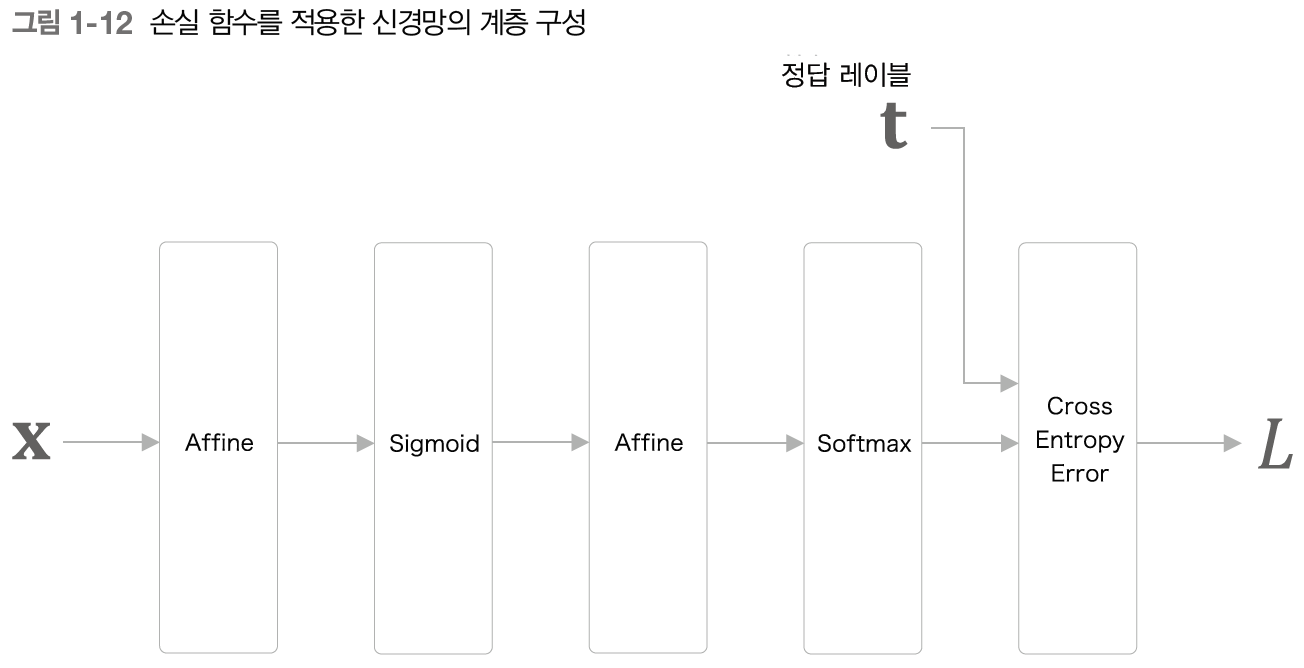

### 1.3.2 미분과 기울기

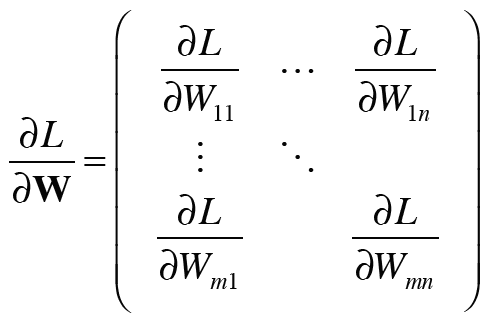

### 1.3.3 연쇄법칙 (chain rule)

### 1.3.4 계산 그래프

기본적인 +, x 노드 이외에 2권에선 분기노드(2개)/repeat노드(n개) 와 Sum노드 설명이 추가되었다. 

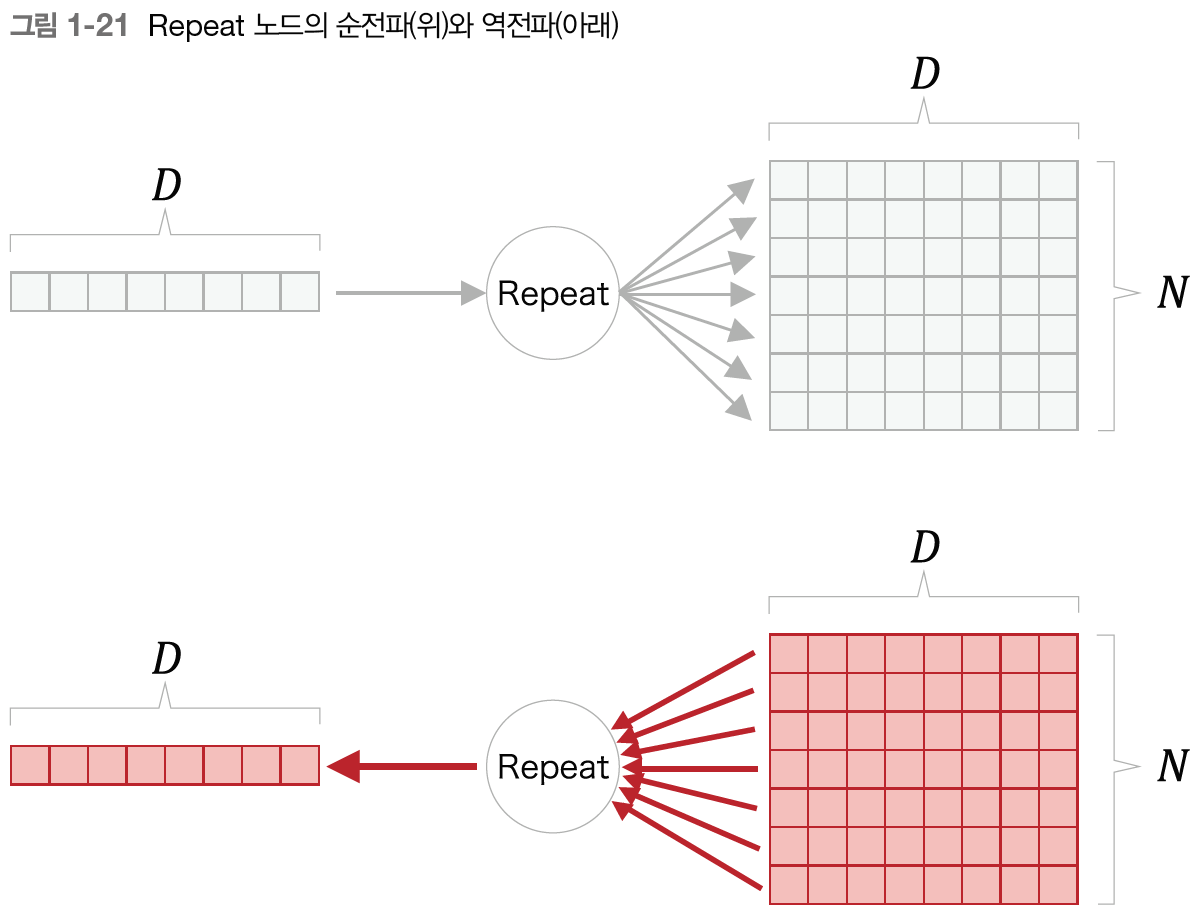

In [28]:
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) # 역전파. 역전파는 상류에서 온 기울기들의 합이다. keepdims로 2차원 배열의 차원 수를 유지. dx.shape가 (1, D)냐 (D,)냐의 차이. 

In [29]:
x

array([[-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ]])

In [30]:
y

array([[-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ],
       [-1.71074616,  2.1367113 ,  0.33250617, -0.69776422,  0.11192385,
         0.02122358,  0.95982327, -0.5666782 ]])

In [31]:
dy

array([[ 1.54128069e+00,  6.99640470e-01,  3.94766730e-01,
        -6.09263123e-01,  1.76859852e-01, -7.62732902e-01,
         2.86663280e-01, -7.25314861e-01],
       [-8.88452043e-01, -5.17006530e-01,  4.89909879e-01,
         4.87924278e-02, -2.69838147e-01, -4.57498235e-02,
         3.62545116e-01,  1.04174712e-01],
       [ 2.30425133e+00,  1.56043602e+00, -3.56630199e-01,
         1.38830554e-01,  1.15535384e+00,  1.67236798e+00,
        -1.77861169e-02,  7.54559441e-01],
       [ 8.82370273e-01, -8.02394703e-01, -1.03423535e+00,
         1.64383138e+00, -7.28922154e-01, -1.63541874e+00,
         4.32677637e-02,  7.66082871e-01],
       [ 4.73600631e-01,  1.24812622e+00,  1.47410061e-03,
        -6.09903475e-01, -1.84054537e+00, -9.88006206e-01,
         5.52746818e-01, -5.38102060e-01],
       [ 8.71612398e-01,  1.85328836e+00,  2.03922924e-01,
        -2.95498099e-01, -1.40214580e-01,  9.46114278e-01,
        -5.27133001e-01, -7.32955956e-01],
       [ 1.02583608e+00,  1.299011

In [32]:
dx

array([[ 6.21049936,  5.34110131,  0.53541884,  1.24803564, -1.32083449,
        -1.79070937, -0.46311902,  0.92940259]])

Sum 노드는 상류의 기울기를 모든 화살표에 분배한다. 

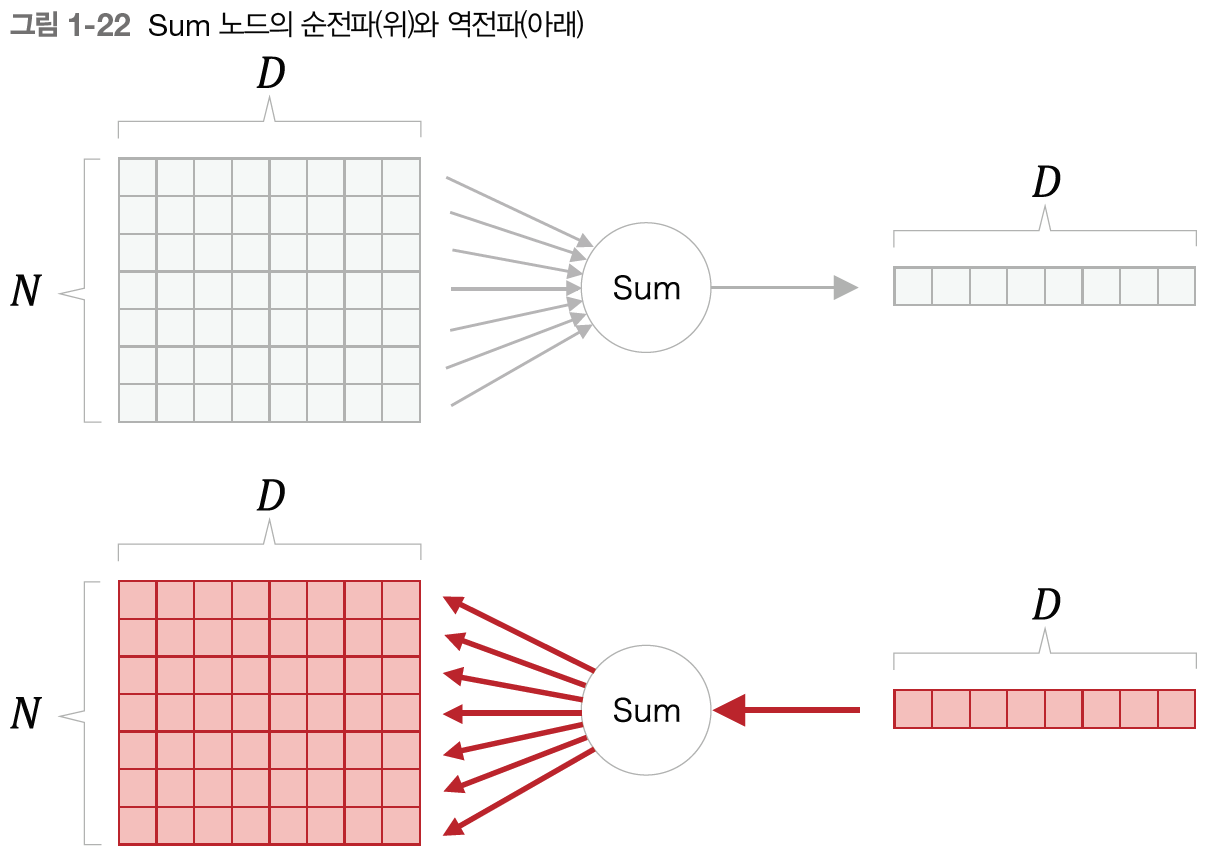

In [34]:
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

In [35]:
x

array([[ 0.55003848,  1.21059764, -0.2415839 ,  1.02657778, -0.51928563,
         1.32640872, -0.35852552,  0.19366294],
       [-2.30913303,  1.42021764,  1.46351965, -0.74038685,  0.38268398,
        -0.8211049 , -0.99616796,  0.65077417],
       [ 0.65410516, -0.40480422,  0.55935609,  0.66339171, -1.31266117,
         0.07358318,  0.92340299,  1.6325096 ],
       [ 1.40973154, -1.32243671, -0.49366362,  0.46394472, -1.71415882,
         0.86366752, -0.06375173, -1.89570227],
       [-0.88230119,  0.20014317, -1.26977061,  1.13738993, -1.90497149,
         0.84924607,  0.63852299,  0.48568549],
       [-1.46811025,  1.27353259,  0.87126775,  1.34403646, -0.5209041 ,
         0.70079948, -0.67306186,  0.76762155],
       [-0.06071986, -0.78702981, -0.06227752,  0.26802287,  0.57314634,
         0.19429932,  0.5425779 ,  1.18451519]])

In [36]:
y

array([[-2.10638916,  1.59022031,  0.82684785,  4.16297662, -5.0161509 ,
         3.1868994 ,  0.0129968 ,  3.01906666]])

In [37]:
dy

array([[-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061]])

In [38]:
dx

array([[-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061],
       [-0.10895979,  0.24277693,  0.04546344, -0.87190498,  1.55130313,
        -0.52359561,  1.13143797,  1.88605061]])

matmul 노드는 x노드와 비슷하다. 

but, aW와 ax는 each example에 대해 모든 W_i, x_i를 sum한 행렬이다. 

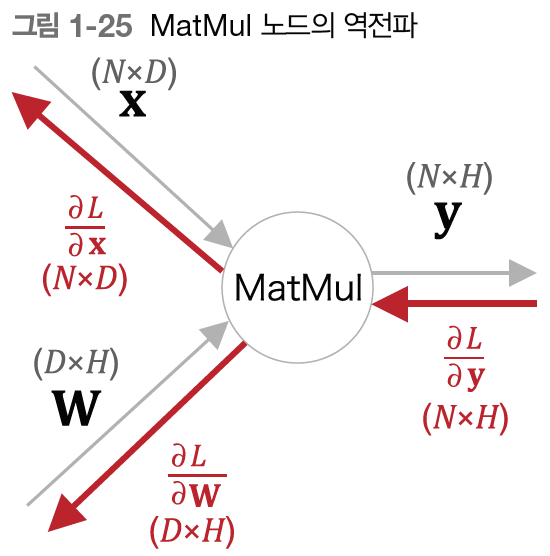

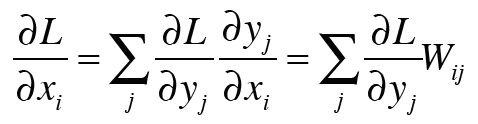

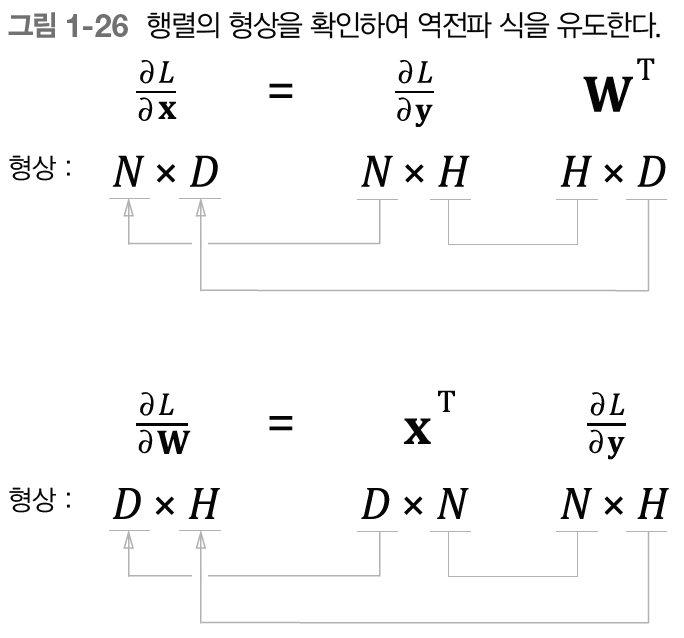

aL/ax를 구할 땐 W가 들어가고, aL/aW를 구할 땐 x가 들어간다. 곱셈처럼 서로 바뀌어 들어가는 것이다. 

In [40]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = np.zeros_like(W)
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        print(self.params)
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW # ...로 생략(ellipsis)를 한 것임. np배열이 가리키는 메모리 위치를 고정시키고 그 위치에 원소를 덮어쓴 것임.  == deep copy와 같은 효과. 
        return dx

In [126]:
# Trailing comma after a variable. 
a, = [[[1,2,3]]]  # unpack 한다. 
a

[[1, 2, 3]]

In [128]:
1

1

In [132]:
1, # makes it a tuple

(1,)

In [131]:
(a,) = [[1,2,3]]
a

[1, 2, 3]

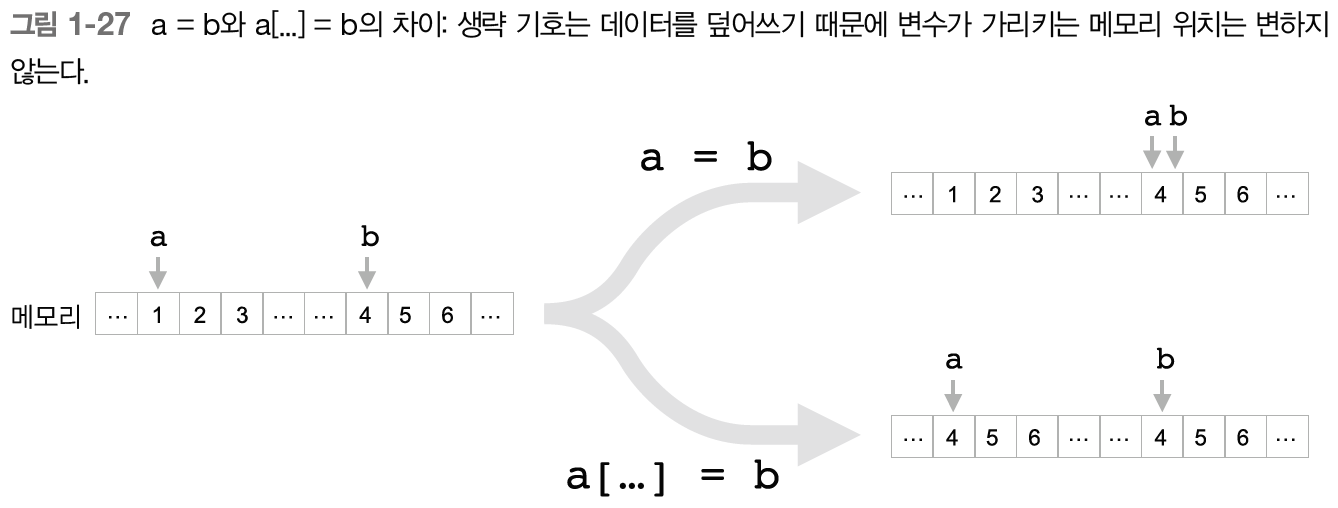

In [1]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a = b

print(id(a), id(b)) # 같음 

2385648668144 2385648668144


In [2]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a[...] = b

print(id(a), id(b)) # 다름. 

2385648528880 2385652980992


In [109]:
# ...(쌩략기호)는 다차원 배열일 때 [:, :, :, 3] = [..., 3]의 의미이다. 단순히 slice이다. 

foo = np.array([1,2,3])
bar = foo

bar[...][0] = 9
print(foo)
print(bar)

[9 2 3]
[9 2 3]


### 1.3.5 기울기 도출과 역전파 구현

In [134]:
# 시그모이드 계층

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

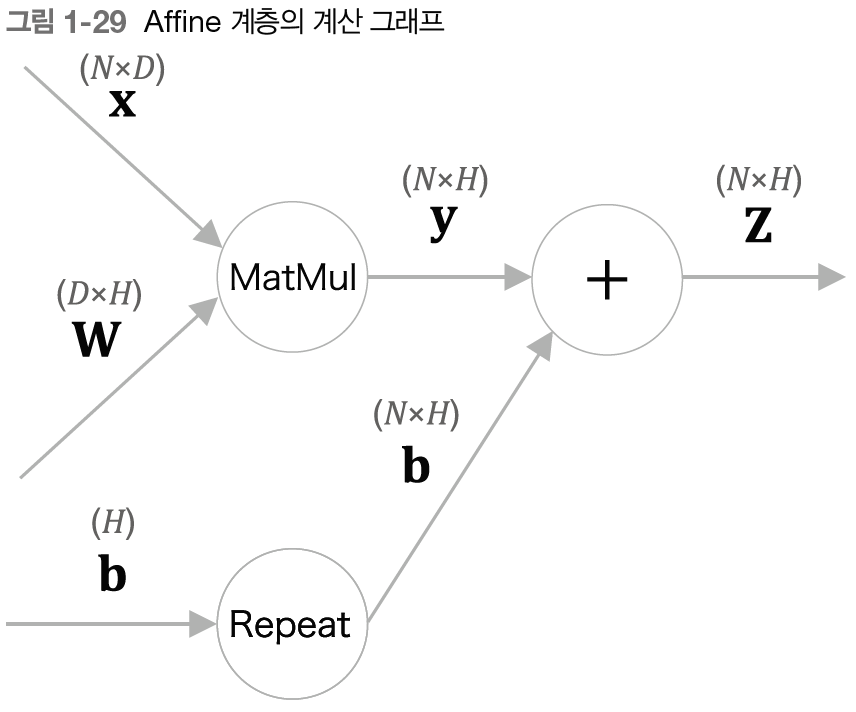

In [135]:
# Affine 계층

def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None
    
def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    self.x = x
    return out

def backward(self, dout):
    W, b = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    db = np.sum(dout, axis=0)
    
    self.grads[0][...] = dW
    self.grads[0[...]] = db
    
    return dx

Softmax with Loss 계층 구현 생략. 코드는 common/layers.py 참조. 

### 1.3.6 가중치 갱신

SGD(Stochastic Gradient Descent)를 쓰도록 한다. 

Stochastic은 무작위로 선택된 데이터(미니배치)에 대한 기울기를 이용한다는 뜻. 

에타는 learning rate이다. 

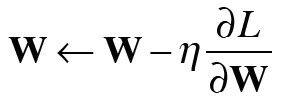

In [136]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] = params[i] - self.lr * grads[i]

이하 내용 생략. 

## 1.4 신경망으로 문제를 풀다. 
- ### 1.4.1 스파이럴 데이터셋
- ### 1.4.2 신경망 구현
- ### 1.4.3 학습용 코드
- ### 1.4.4 Trainer 클래스

## 1.5 계산 고속화
- ### 1.5.1 비트 정밀도
- ### 1.5.2 GPU(쿠파이)

## 1.6 정리
- 신경망은 입력/은닉/출력 층을 가진다. 
- 완결연결계층에 의해 선형 변환이 이뤄지고, 활성화 함수에 의해 비선형 변환이 이뤄진다. 
- 완전연결계층이나 미니배치 처리는 행렬로 모아 한꺼번에 계산할 수 있다. 
- 오차역전파법을 사용해 신경망 손실에 관한 기울기를 효율적으로 구할 수 있다. 
- 신경망이 수행하는 처리는 계산그래프로 시각화할 수 있으며 순전파와 역전파를 이해하는데 도움이 된다. 
- 신경망의 구성요소들을 계층으로 모듈화해두면, 이를 조립하여 신경망을 쉽게 구성할 수 있다. 
- 신경망 고속화에는 GPU를 이용한 병렬 계산과 데이터의 비트 정밀도가 중요하다. 